In [1]:
import pandas as pd

# Read in data from "births.csv" and "score.csv" as dataframes
births_df=pd.read_csv("files/births.csv", sep=",")
score_df=pd.read_csv("files/score.csv", sep=",")

In [2]:
# Examine the births dataset
print(births_df.head(10))
print(births_df.dtypes)
print(births_df.describe())

   id  bweight  lowbw    gestwks  preterm  matage  hyp  sex
0   1     2974      0  38.520000      0.0      34    0    2
1   2     3270      0        NaN      NaN      30    0    1
2   3     2620      0  38.150002      0.0      35    0    2
3   4     3751      0  39.799999      0.0      31    0    1
4   5     3200      0  38.889999      0.0      33    1    1
5   6     3673      0  40.970001      0.0      33    0    2
6   7     3628      0  42.139999      0.0      29    0    2
7   8     3773      0  40.209999      0.0      37    0    1
8   9     3960      0  42.029999      0.0      36    0    2
9  10     3405      0  39.330002      0.0      39    0    1
id           int64
bweight      int64
lowbw        int64
gestwks    float64
preterm    float64
matage       int64
hyp          int64
sex          int64
dtype: object
               id      bweight       lowbw     gestwks     preterm  \
count  500.000000   500.000000  500.000000  490.000000  490.000000   
mean   250.500000  3136.884000    

In [3]:
import pandas as pd

# Transform categorical variables to the right format with labels.
births_df["lowbw"] = births_df["lowbw"].astype("category")
births_df["preterm"] = births_df["preterm"].astype("category")
births_df["hyp"] = births_df["hyp"].astype("category")
births_df["sex"] = births_df["sex"].astype("category")

# Define category renaming mappings.
lowbw_categories = {0: "Normal birthweight", 1: "Low birthweight"}
preterm_categories = {0: "Not preterm", 1: "Preterm"}
hyp_categories = {0: "No maternal hypertension", 1: "Maternal hypertension"}
sex_categories = {1: "Male", 2: "Female"}

# Rename categories for readability.
births_df["lowbw"].cat.rename_categories(lowbw_categories, inplace=True)
births_df["preterm"].cat.rename_categories(preterm_categories, inplace=True)
births_df["hyp"].cat.rename_categories(hyp_categories, inplace=True)
births_df["sex"].cat.rename_categories(sex_categories, inplace=True)

# Display the first few rows of the DataFrame to check the changes.
print(births_df.head())


   id  bweight               lowbw    gestwks      preterm  matage  \
0   1     2974  Normal birthweight  38.520000  Not preterm      34   
1   2     3270  Normal birthweight        NaN          NaN      30   
2   3     2620  Normal birthweight  38.150002  Not preterm      35   
3   4     3751  Normal birthweight  39.799999  Not preterm      31   
4   5     3200  Normal birthweight  38.889999  Not preterm      33   

                        hyp     sex  
0  No maternal hypertension  Female  
1  No maternal hypertension    Male  
2  No maternal hypertension  Female  
3  No maternal hypertension    Male  
4     Maternal hypertension    Male  


In [ ]:
# Create a new DataFrame with any rows with missing data excluded.
births_df_clean = births_df.dropna()
scores_df_clean = scores_df.dropna()

In [5]:
# Merge two dataframes, keeping matching and unmatching rows
merged_df=pd.merge(births_df_clean, score_df_clean, on="id", how="outer")
# This creates a new datafarme merging by id number. 
merged_df.info()
# The result of this operation includes 490 rows. However only 425 of these have a value in the column "score".



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   id       490 non-null    int64   
 1   bweight  490 non-null    int64   
 2   lowbw    490 non-null    category
 3   gestwks  490 non-null    float64 
 4   preterm  490 non-null    category
 5   matage   490 non-null    int64   
 6   hyp      490 non-null    category
 7   sex      490 non-null    category
 8   score    425 non-null    float64 
dtypes: category(4), float64(2), int64(3)
memory usage: 21.7 KB


In [6]:
# Reorder the merged dataset by variable score
sorted_merged_df=merged_df.sort_values(by="score", ascending=True).copy()



In [13]:

continuous_variables=merged_df[["bweight","matage","gestwks","score"]]
correlation_matrix=continuous_variables.corr()
print("Correlation matrix: ")
print(correlation_matrix)

# This shows a correlation matrix between the continuous variable showing the Pearson correlation coefficient between the variables. 
# Birthweight and gestiational weeks have a moderately strong correlation with a Pearson correlaiton coefficient score of 0.712.




Correlation matrix: 
          bweight    matage   gestwks     score
bweight  1.000000  0.017933  0.712216  0.336506
matage   0.017933  1.000000  0.024851  0.004110
gestwks  0.712216  0.024851  1.000000  0.405996
score    0.336506  0.004110  0.405996  1.000000


In [14]:
# Examine the two way distribution of the categorical variables in tabular form.

# Crosstab of sex and hypertension
sex_hyp_group = pd.crosstab(merged_df["sex"], merged_df["hyp"])
print('Sex and Hypertension distribution:')
print(sex_hyp_group)

# Crosstab of sex and preterm births
sex_preterm_group = pd.crosstab(merged_df["sex"], merged_df["preterm"])
print('Sex and Preterm distribution:')
print(sex_preterm_group)

# Crosstab of preterm births and hypertension
preterm_hyp_group = pd.crosstab(merged_df["preterm"], merged_df["hyp"])
print('Preterm and Hypertension distribution:')
print(preterm_hyp_group)

# Crosstab of low birthweight and sex
lowbw_sex_group = pd.crosstab(merged_df["sex"], merged_df["lowbw"])
print('Low birthweight and Sex distribution:')
print(lowbw_sex_group)

# Crosstab of low birthweight and hypertension
lowbw_hyp_group = pd.crosstab(merged_df["lowbw"], merged_df["hyp"])
print('Low birthweight and Hypertension distribution:')
print(lowbw_hyp_group)

# Crosstab of low birthweight and preterm births
lowbw_preterm_group = pd.crosstab(merged_df["lowbw"], merged_df["preterm"])
print('Low birthweight and Preterm distribution:')
print(lowbw_preterm_group)

Sex and Hypertension distribution:
hyp     No maternal hypertension  Maternal hypertension
sex                                                    
Male                         214                     42
Female                       205                     29
Sex and Preterm distribution:
preterm  Not preterm  Preterm
sex                          
Male             225       31
Female           202       32
Preterm and Hypertension distribution:
hyp          No maternal hypertension  Maternal hypertension
preterm                                                     
Not preterm                       375                     52
Preterm                            44                     19
Low birthweight and Sex distribution:
lowbw   Normal birthweight  Low birthweight
sex                                        
Male                   230               26
Female                 201               33
Low birthweight and Hypertension distribution:
hyp                 No maternal hypertension  M

In [15]:
import numpy as np

# Create a new variable highscore that identifies a score higher than 150

merged_df["highscore"] = np.where(merged_df["score"] > 150, "Yes", "No")


In [19]:
# Create an aggregated version of the dataset that reports average birthweight by high score and sex

aggregated_df=merged_df.groupby(["highscore","sex"])["bweight"].agg(average_bweight="mean").reset_index()
print(aggregated_df)


  highscore     sex  average_bweight
0        No    Male      3014.968750
1        No  Female      2835.111111
2       Yes    Male      3308.812500
3       Yes  Female      3090.427778


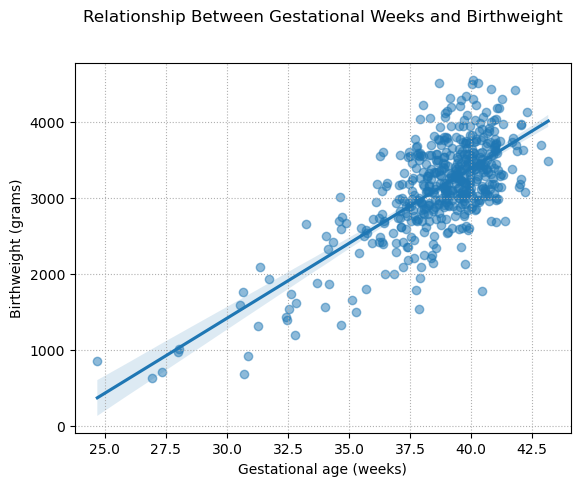

In [20]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.regplot(x=merged_df["gestwks"], y=merged_df["bweight"],scatter_kws={"alpha": 0.5})
plt.xlabel("Gestational age (weeks)")
plt.ylabel("Birthweight (grams)")
plt.title("Relationship Between Gestational Weeks and Birthweight", pad=30)
plt.grid(True, linestyle=":")
plt.savefig("Bweightvsgestwks.pdf", format="pdf")
plt.show()




In [12]:
merged_df.to_excel("cleaned_merged_dataset.xlsx", index=False)